In [220]:
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf


# Load Data

In [123]:
df_trap = gpd.read_file('../data/Processed data/trap.geojson')
df_trap

season_year week test_id                 block  trap trap_type  \
0             2021   39   53373  12XX W GREENLEAF AVE  T018    GRAVID   
1             2021   39   53381  61XX W FULLERTON AVE  T013    GRAVID   
2             2021   39   53406        10XX E 67TH ST  T073    GRAVID   
3             2021   39   53401        52XX W 63RD ST  T065    GRAVID   
4             2021   39   53383     5XX S CENTRAL AVE  T031    GRAVID   
...            ...  ...     ...                   ...   ...       ...   
32873         2007   21   20012     75XX N OAKLEY AVE  T148    GRAVID   
32874         2007   21   20038       22XX W 113TH ST  T086    GRAVID   
32875         2007   21   20051         2XX W 89TH ST  T096       CDC   
32876         2007   21   20031      22XX N CANNON DR  T054    GRAVID   
32877         2007   21   20027      22XX N CANNON DR  T054    GRAVID   

                 test_date  number_of_mosquitoes    result  \
0      2021-09-30T00:09:00                     2  negative   
1      2021-09-30T00:09:00                    13  negative   
2      2021-09-30T00:09:00                     7  negative   
3      2021-09-30T00:09:00                     8  negative   
4      2021-09-30T00:09:00                     5  positive   
...                    ...                   ...       ...   
32873  2007-05-29T00:05:00                     1  negative   
32874  2007-05-29T00:05:00                     1  negative   
32875  2007-05-29T00:05:00                     5  negative   
32876  2007-05-29T00:05:00                     2  negative   
32877  2007-05-29T00:05:00                     3  negative   

                      species   latitude  longitude  \
0      CULEX PIPIENS/RESTUANS  42.010529 -87.660845   
1      CULEX PIPIENS/RESTUANS  41.923887 -87.778910   
2      CULEX PIPIENS/RESTUANS  41.773085 -87.600168   
3      CULEX PIPIENS/RESTUANS  41.778305 -87.754366   
4      CULEX PIPIENS/RESTUANS  41.872873 -87.764737   
...                       ...        ...        ...   
32873  CULEX PIPIENS/RESTUANS  42.017801 -87.687601   
32874  CULEX PIPIENS/RESTUANS  41.688171 -87.678252   
32875          CULEX RESTUANS  41.732428 -87.631056   
32876  CULEX PIPIENS/RESTUANS  41.922512 -87.632378   
32877          CULEX RESTUANS  41.922512 -87.632378   

                                                location  month  result_b  \
0      {'latitude': '42.01052928915475', 'longitude':...      9         0   
1      {'latitude': '41.92388736426867', 'longitude':...      9         0   
2      {'latitude': '41.773085401492715', 'longitude'...      9         0   
3      {'latitude': '41.77830515554422', 'longitude':...      9         0   
4      {'latitude': '41.87287286249572', 'longitude':...      9         1   
...                                                  ...    ...       ...   
32873  {'latitude': '42.0178008501155', 'longitude': ...      5         0   
32874  {'latitude': '41.688170589570205', 'longitude'...      5         0   
32875  {'latitude': '41.73242806400838', 'longitude':...      5         0   
32876  {'latitude': '41.922512376871495', 'longitude'...      5         0   
32877  {'latitude': '41.922512376871495', 'longitude'...      5         0   

      year_week                    geometry  
0      2021/W39  POINT (-87.66085 42.01053)  
1      2021/W39  POINT (-87.77891 41.92389)  
2      2021/W39  POINT (-87.60017 41.77309)  
3      2021/W39  POINT (-87.75437 41.77831)  
4      2021/W39  POINT (-87.76474 41.87287)  
...         ...                         ...  
32873  2007/W21  POINT (-87.68760 42.01780)  
32874  2007/W21  POINT (-87.67825 41.68817)  
32875  2007/W21  POINT (-87.63106 41.73243)  
32876  2007/W21  POINT (-87.63238 41.92251)  
32877  2007/W21  POINT (-87.63238 41.92251)  

[32878 rows x 17 columns]

In [135]:
water_df = gpd.read_file('../data/Processed data/water.geojson')
michLake = gpd.read_file('../data/Processed data/michLake.geojson')
spray = gpd.read_file("../data/Processed data/spray.geojson")

In [97]:
water_df = gpd.GeoDataFrame(water_df, crs="EPSG:4326",geometry='geometry')


In [132]:
forestry = gpd.read_file("../data/Forestry/Forestry.shp")
park = gpd.read_file("../data/Parks - Chicago Park District Park Boundaries (current).geojson")
forestry = forestry.to_crs(park.crs)

In [192]:
weather = pd.read_csv('../data/Processed data/weather.csv')

In [296]:
sanitation = gpd.read_file("../data/Processed data/sanitation.geojson")

# feature engineering

### Distance to geospatial features

In [36]:
# all these location feature are multipolygon, gotta convert it to distance

In [316]:

    # GEODATAFRAME THAT WILL BE POINTS
    # "RIVERS TO COMPARE AGAINST"


def polygon_to_multipoints(multipoligons):
        # MULTIPOINT FUNCTION
        from shapely.geometry import MultiPoint

        # GET ONE LARGE LIST OF POLYGONS
        polygons = []

        [
            # EXTEND LIST OF POLYGONS
            polygons.extend(
                # TURN MULTIPOLYGON GEOMETRY TO LIST OF SINGLE POLYGONS
                list(multipolys)
                )
            # CYCLE THROUGH THE DISTRICT GEOMETRIES
            for multipolys in multipoligons['geometry'].values
            ]


        # GET ONE LARGE LIST OF POINTS
        points = []

        [   
            # EXTEND POINT LIST
            points.extend(
                # GET LIST OF POINTS FROM THE EXTERIOR OF EACH POLYGON
                list(polygon.exterior.coords)
                ) 
            for polygon in polygons
        ]
        # GEOMETRY OF MULTIPLE POINTS
        return MultiPoint(points)


def nearest_distance(water,traps):

        multipoints = polygon_to_multipoints(water)
        # MAIN COMPARISION POLYGONS
        traps
        # FIND NEAREST POINTS FUNCTION
        from shapely.ops import nearest_points

        # GET NEW COLUMN OF NEAREST DISTANCE
        return traps.geometry.apply(
            # CYCLE THROUGH EACH GEOMETRY
            lambda geom: 
            # FIND DISTANCE BETWEEN GEOM AND NEAREST POINT
            geom.distance(
                # FIND NEAREST POINT
                nearest_points(multipoints, geom)[0]
                )
            )
        

In [ ]:
df_trap['distance_to_water'] = nearest_distance(water_df,df_trap)
df_trap['distance_to_michLake'] = nearest_distance(michLake,df_trap)

/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1531614597.py:14: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(multipolys)
/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1531614597.py:14: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(multipolys)


0        0.000844
1        0.138857
2        0.025234
3        0.159379
4        0.143607
           ...   
32873    0.021481
32874    0.135382
32875    0.070833
32876    0.002650
32877    0.002650
Name: geometry, Length: 32878, dtype: float64

In [146]:
df_trap['distance_to_parks'] = nearest_distance(park,df_trap)


/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1531614597.py:14: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(multipolys)
/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1531614597.py:14: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(multipolys)


In [ ]:
df_trap['distance_to_forest'] = nearest_distance(forestry,df_trap)

In [176]:
df_trap['week'] = df_trap['week'].astype('int64')

In [213]:
df_trap.columns

Index(['season_year', 'week', 'test_id', 'block', 'trap', 'trap_type',
       'test_date', 'number_of_mosquitoes', 'result', 'species', 'latitude',
       'longitude', 'location', 'month', 'result_b', 'year_week', 'geometry',
       'distance_to_water', 'distance_to_michLake', 'distance_to_parks'],
      dtype='object')

### add weather feature

In [200]:
weather.drop('Unnamed: 0',axis=1,inplace=True)

In [210]:
weather_by_week = weather.groupby('year_week').mean()[['AWND','PRCP','tavg','WDF2']].reset_index()

In [240]:
df = pd.merge(df_trap,weather_by_week,how='left',on='year_week')

### add sanitation data

In [261]:
print(df['year_week'].min(),
  df['year_week'].max())

2007/W21 2021/W39


In [297]:
sanitation = sanitation[(sanitation['year_week'] >= '2007/W21') & (sanitation['year_week'] <= '2021/W39')]

In [340]:
from shapely.geometry import MultiPoint
year_week_ = []
geometry_ = []
for i in sanitation['year_week']:
  point_list = list(sanitation[sanitation['year_week'] == i]['geometry'])
  geometry_.extend(MultiPoint(point_list))
  year_week_.extend(i)
  

/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1423912787.py:6: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  geometry_.extend(MultiPoint(point_list))
/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1423912787.py:6: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  geometry_.extend(MultiPoint(point_list))
/var/folders/gv/vphltdx54zd89jk01h92js380000gn/T/ipykernel_26584/1423912787.py:6: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  geometry_.extend(MultiPoint(point_list))
/var/folders/gv/v

In [ ]:
# now calculate the distance from traps to nearest sanitation violation. 
# First turn the sanitation points in each week into a multipoint object.

sanitation_by_week = pd.DataFrame([])

for j in sanitation['year_week']:
  sanitation[sanitation['year_week'] == j]['geometry']


In [313]:
# In sanitation dataset, for loop all the year_week, 
# and calculate in the same year_week, the distance from every point to the nearest sanitation violation.
#  If there is no sanitation violation in that week, just impute a relatively large number


# get every row in df, calculate the distance to nearest sanitation violation in the same week

def nearest_distance(water,traps):

        multipoints = polygon_to_multipoints(water)
        # MAIN COMPARISION POLYGONS
        traps
        # FIND NEAREST POINTS FUNCTION
        from shapely.ops import nearest_points

        # GET NEW COLUMN OF NEAREST DISTANCE
        return traps.geometry.apply(
            # CYCLE THROUGH EACH GEOMETRY
            lambda geom: 
            # FIND DISTANCE BETWEEN GEOM AND NEAREST POINT
            geom.distance(
                # FIND NEAREST POINT
                nearest_points(multipoints, geom)[0]
                )
            )


df.head().apply(
  lambda x :
  x['year_week']
)
  

2021/W39
2021/W39
2021/W39
2021/W39
2021/W39


In [290]:
# check if week features in sanitation are included in trap data, in order to compare later
False_rec = [x for x in sanitation['year_week'] if x not in df['year_week']] 
False_CF = [y for y in df['year_week'] if y not in sanitation['year_week']]  

In [247]:
df.head()

season_year  week test_id                 block  trap trap_type  \
0         2021    39   53373  12XX W GREENLEAF AVE  T018    GRAVID   
1         2021    39   53381  61XX W FULLERTON AVE  T013    GRAVID   
2         2021    39   53406        10XX E 67TH ST  T073    GRAVID   
3         2021    39   53401        52XX W 63RD ST  T065    GRAVID   
4         2021    39   53383     5XX S CENTRAL AVE  T031    GRAVID   

             test_date  number_of_mosquitoes    result  \
0  2021-09-30T00:09:00                     2  negative   
1  2021-09-30T00:09:00                    13  negative   
2  2021-09-30T00:09:00                     7  negative   
3  2021-09-30T00:09:00                     8  negative   
4  2021-09-30T00:09:00                     5  positive   

                  species   latitude  longitude  \
0  CULEX PIPIENS/RESTUANS  42.010529 -87.660845   
1  CULEX PIPIENS/RESTUANS  41.923887 -87.778910   
2  CULEX PIPIENS/RESTUANS  41.773085 -87.600168   
3  CULEX PIPIENS/RESTUANS  41.778305 -87.754366   
4  CULEX PIPIENS/RESTUANS  41.872873 -87.764737   

                                            location  month  result_b  \
0  {'latitude': '42.01052928915475', 'longitude':...      9         0   
1  {'latitude': '41.92388736426867', 'longitude':...      9         0   
2  {'latitude': '41.773085401492715', 'longitude'...      9         0   
3  {'latitude': '41.77830515554422', 'longitude':...      9         0   
4  {'latitude': '41.87287286249572', 'longitude':...      9         1   

  year_week                    geometry  distance_to_water  \
0  2021/W39  POINT (-87.66085 42.01053)           0.005725   
1  2021/W39  POINT (-87.77891 41.92389)           0.004473   
2  2021/W39  POINT (-87.60017 41.77309)           0.000914   
3  2021/W39  POINT (-87.75437 41.77831)           0.041485   
4  2021/W39  POINT (-87.76474 41.87287)           0.002376   

   distance_to_michLake  distance_to_parks      AWND      PRCP       tavg  \
0              0.000844           0.000077  7.478571  0.007143  72.571429   
1              0.138857           0.000653  7.478571  0.007143  72.571429   
2              0.025234           0.001209  7.478571  0.007143  72.571429   
3              0.159379           0.002211  7.478571  0.007143  72.571429   
4              0.143607           0.000028  7.478571  0.007143  72.571429   

         WDF2  
0  114.285714  
1  114.285714  
2  114.285714  
3  114.285714  
4  114.285714

### corr matrix

In [226]:
pd.set_option('display.max_columns', None)
df.head()

season_year  week test_id                 block  trap trap_type  \
0         2021    39   53373  12XX W GREENLEAF AVE  T018    GRAVID   
1         2021    39   53381  61XX W FULLERTON AVE  T013    GRAVID   
2         2021    39   53406        10XX E 67TH ST  T073    GRAVID   
3         2021    39   53401        52XX W 63RD ST  T065    GRAVID   
4         2021    39   53383     5XX S CENTRAL AVE  T031    GRAVID   

             test_date  number_of_mosquitoes    result  \
0  2021-09-30T00:09:00                     2  negative   
1  2021-09-30T00:09:00                    13  negative   
2  2021-09-30T00:09:00                     7  negative   
3  2021-09-30T00:09:00                     8  negative   
4  2021-09-30T00:09:00                     5  positive   

                  species   latitude  longitude  \
0  CULEX PIPIENS/RESTUANS  42.010529 -87.660845   
1  CULEX PIPIENS/RESTUANS  41.923887 -87.778910   
2  CULEX PIPIENS/RESTUANS  41.773085 -87.600168   
3  CULEX PIPIENS/RESTUANS  41.778305 -87.754366   
4  CULEX PIPIENS/RESTUANS  41.872873 -87.764737   

                                            location  month  result_b  \
0  {'latitude': '42.01052928915475', 'longitude':...      9         0   
1  {'latitude': '41.92388736426867', 'longitude':...      9         0   
2  {'latitude': '41.773085401492715', 'longitude'...      9         0   
3  {'latitude': '41.77830515554422', 'longitude':...      9         0   
4  {'latitude': '41.87287286249572', 'longitude':...      9         1   

  year_week                    geometry  distance_to_water  \
0  2021/W39  POINT (-87.66085 42.01053)           0.005725   
1  2021/W39  POINT (-87.77891 41.92389)           0.004473   
2  2021/W39  POINT (-87.60017 41.77309)           0.000914   
3  2021/W39  POINT (-87.75437 41.77831)           0.041485   
4  2021/W39  POINT (-87.76474 41.87287)           0.002376   

   distance_to_michLake  distance_to_parks      AWND      PRCP       tavg  \
0              0.000844           0.000077  7.478571  0.007143  72.571429   
1              0.138857           0.000653  7.478571  0.007143  72.571429   
2              0.025234           0.001209  7.478571  0.007143  72.571429   
3              0.159379           0.002211  7.478571  0.007143  72.571429   
4              0.143607           0.000028  7.478571  0.007143  72.571429   

         WDF2  
0  114.285714  
1  114.285714  
2  114.285714  
3  114.285714  
4  114.285714

In [229]:
df.drop(['latitude','longitude','location'],axis=1,inplace=True)

<AxesSubplot:>

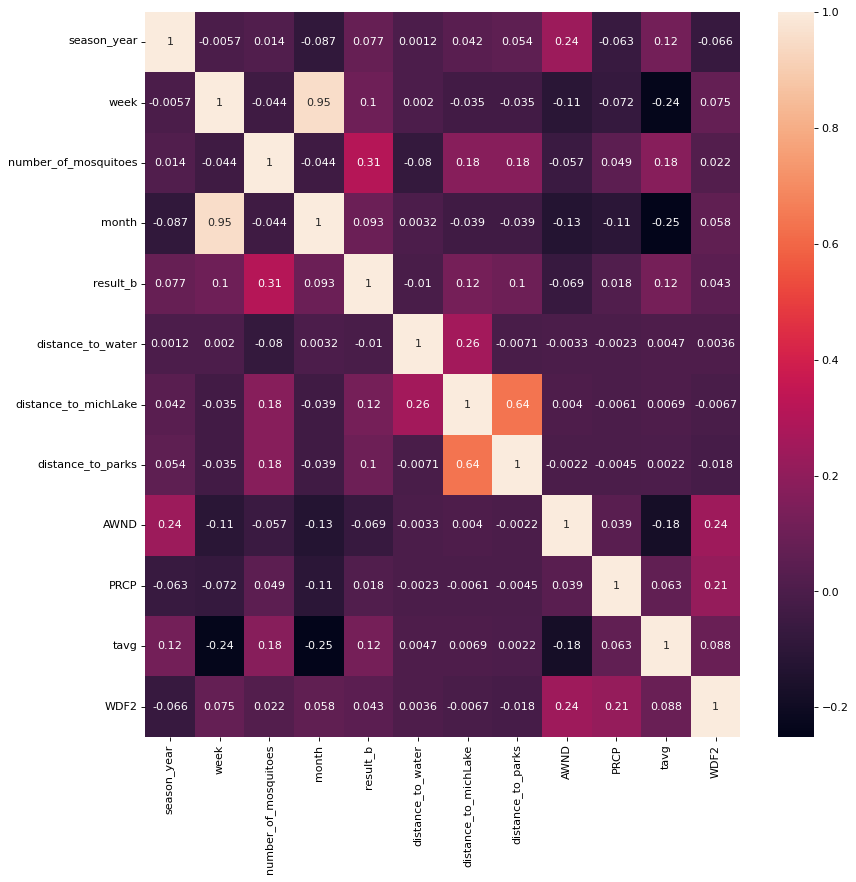

In [230]:
plt.figure(figsize=(12, 12), dpi=80)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)


regression model

In [231]:
df_trap_reg = df

In [238]:
results = sm.Logit(df_trap_reg['result_b'], df_trap_reg[['season_year', 'week', 'number_of_mosquitoes','distance_to_water', 'distance_to_michLake', 'distance_to_parks','AWND','PRCP','tavg','WDF2']]).fit()

Optimization terminated successfully.
         Current function value: 0.229790
         Iterations 8


In [239]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               result_b   No. Observations:                32878
Model:                          Logit   Df Residuals:                    32868
Method:                           MLE   Df Model:                            9
Date:                Thu, 21 Apr 2022   Pseudo R-squ.:                  0.2066
Time:                        15:43:56   Log-Likelihood:                -7555.0
converged:                       True   LL-Null:                       -9521.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
season_year             -0.0090      0.000    -30.732      0.000      -0.010      -0.008
week                     0.1981      0.007     27.732      0.000       0.184       0.212
number_of_mo

In [188]:
spray

Date year_week                                           geometry
0  2011-08-29  2011/W35  POLYGON ((-88.09390 42.38946, -88.09626 42.389...
1  2011-09-07  2011/W36  POLYGON ((-87.80245 41.96843, -87.81844 41.971...
2  2013-07-17  2013/W29  POLYGON ((-87.65954 41.71410, -87.87102 41.972...
3  2013-07-25  2013/W30  POLYGON ((-87.72105 41.93931, -87.73831 41.939...
4  2013-08-08  2013/W32  POLYGON ((-87.71370 41.91723, -87.71510 41.917...
5  2013-08-15  2013/W33  POLYGON ((-87.74859 41.88782, -87.76328 41.887...
6  2013-08-16  2013/W33  POLYGON ((-87.74962 41.91137, -87.78579 41.953...
7  2013-08-22  2013/W34  POLYGON ((-87.61589 41.71393, -87.61823 41.714...
8  2013-08-29  2013/W35  POLYGON ((-87.71181 41.75881, -87.71893 41.760...
9  2013-09-05  2013/W36  POLYGON ((-87.84571 41.97677, -87.84634 41.977...